<a href="https://colab.research.google.com/github/SIMMAVONG/SIMMAVONG/blob/main/16features_Thesis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
dx= pd.read_csv("/content/drive/MyDrive/A  Thesis 2024/Train and Test /dx_threshold.csv")
dx.head(5)

,Class,M1,M2,MP1,MP2,Sc,P9,P15,P16,P26,T6,T17,F4,F20,F21,F22
0,71,9,9,9,9,9,4,3,3,4,4,4,4,4,4,4
1,71,9,9,9,9,9,5,3,5,5,5,5,4,5,2,3
2,71,10,9,8,9,9,4,4,4,4,3,4,5,3,4,4
3,71,10,9,9,8,9,3,4,3,4,4,3,3,3,3,3
4,71,9,9,9,9,9,4,3,2,4,5,4,5,4,4,4


In [5]:
dy= pd.read_csv("/content/drive/MyDrive/A  Thesis 2024/Train and Test /dy_threshold.csv")
dy.head(5)

,y
0,1
1,1
2,1
3,1
4,1


In [10]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   1050 non-null   int64
 1   M1      1050 non-null   int64
 2   M2      1050 non-null   int64
 3   MP1     1050 non-null   int64
 4   MP2     1050 non-null   int64
 5   Sc      1050 non-null   int64
 6   P9      1050 non-null   int64
 7   P15     1050 non-null   int64
 8   P16     1050 non-null   int64
 9   P26     1050 non-null   int64
 10  T6      1050 non-null   int64
 11  T17     1050 non-null   int64
 12  F4      1050 non-null   int64
 13  F20     1050 non-null   int64
 14  F21     1050 non-null   int64
 15  F22     1050 non-null   int64
dtypes: int64(16)
memory usage: 131.4 KB


In [8]:
dy.info()
print(dy.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       1050 non-null   int64
dtypes: int64(1)
memory usage: 8.3 KB
y
0    631
1    419
dtype: int64


In [14]:
features1 = dx
features=list(features1.columns)
X = features1[features]


In [15]:
y=dy

# **Train and test data sets after we how to do feature selection using Random Forests**

In [16]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Create train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# **Feature importances with forests of trees**

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

For Classification into y

<ipython-input-17-77d7123535e8>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X, y)


Feature ranking:
1. feature 1 - M1 (0.152951) 
2. feature 2 - M2 (0.104140) 
3. feature 4 - MP2 (0.074684) 
4. feature 10 - T6 (0.073555) 
5. feature 6 - P9 (0.070993) 
6. feature 3 - MP1 (0.070445) 
7. feature 9 - P26 (0.070227) 
8. feature 11 - T17 (0.069223) 
9. feature 13 - F20 (0.057706) 
10. feature 14 - F21 (0.047823) 
11. feature 0 - Class (0.046682) 
12. feature 15 - F22 (0.045008) 
13. feature 7 - P15 (0.035336) 
14. feature 8 - P16 (0.027774) 
15. feature 12 - F4 (0.027263) 
16. feature 5 - Sc (0.026189) 


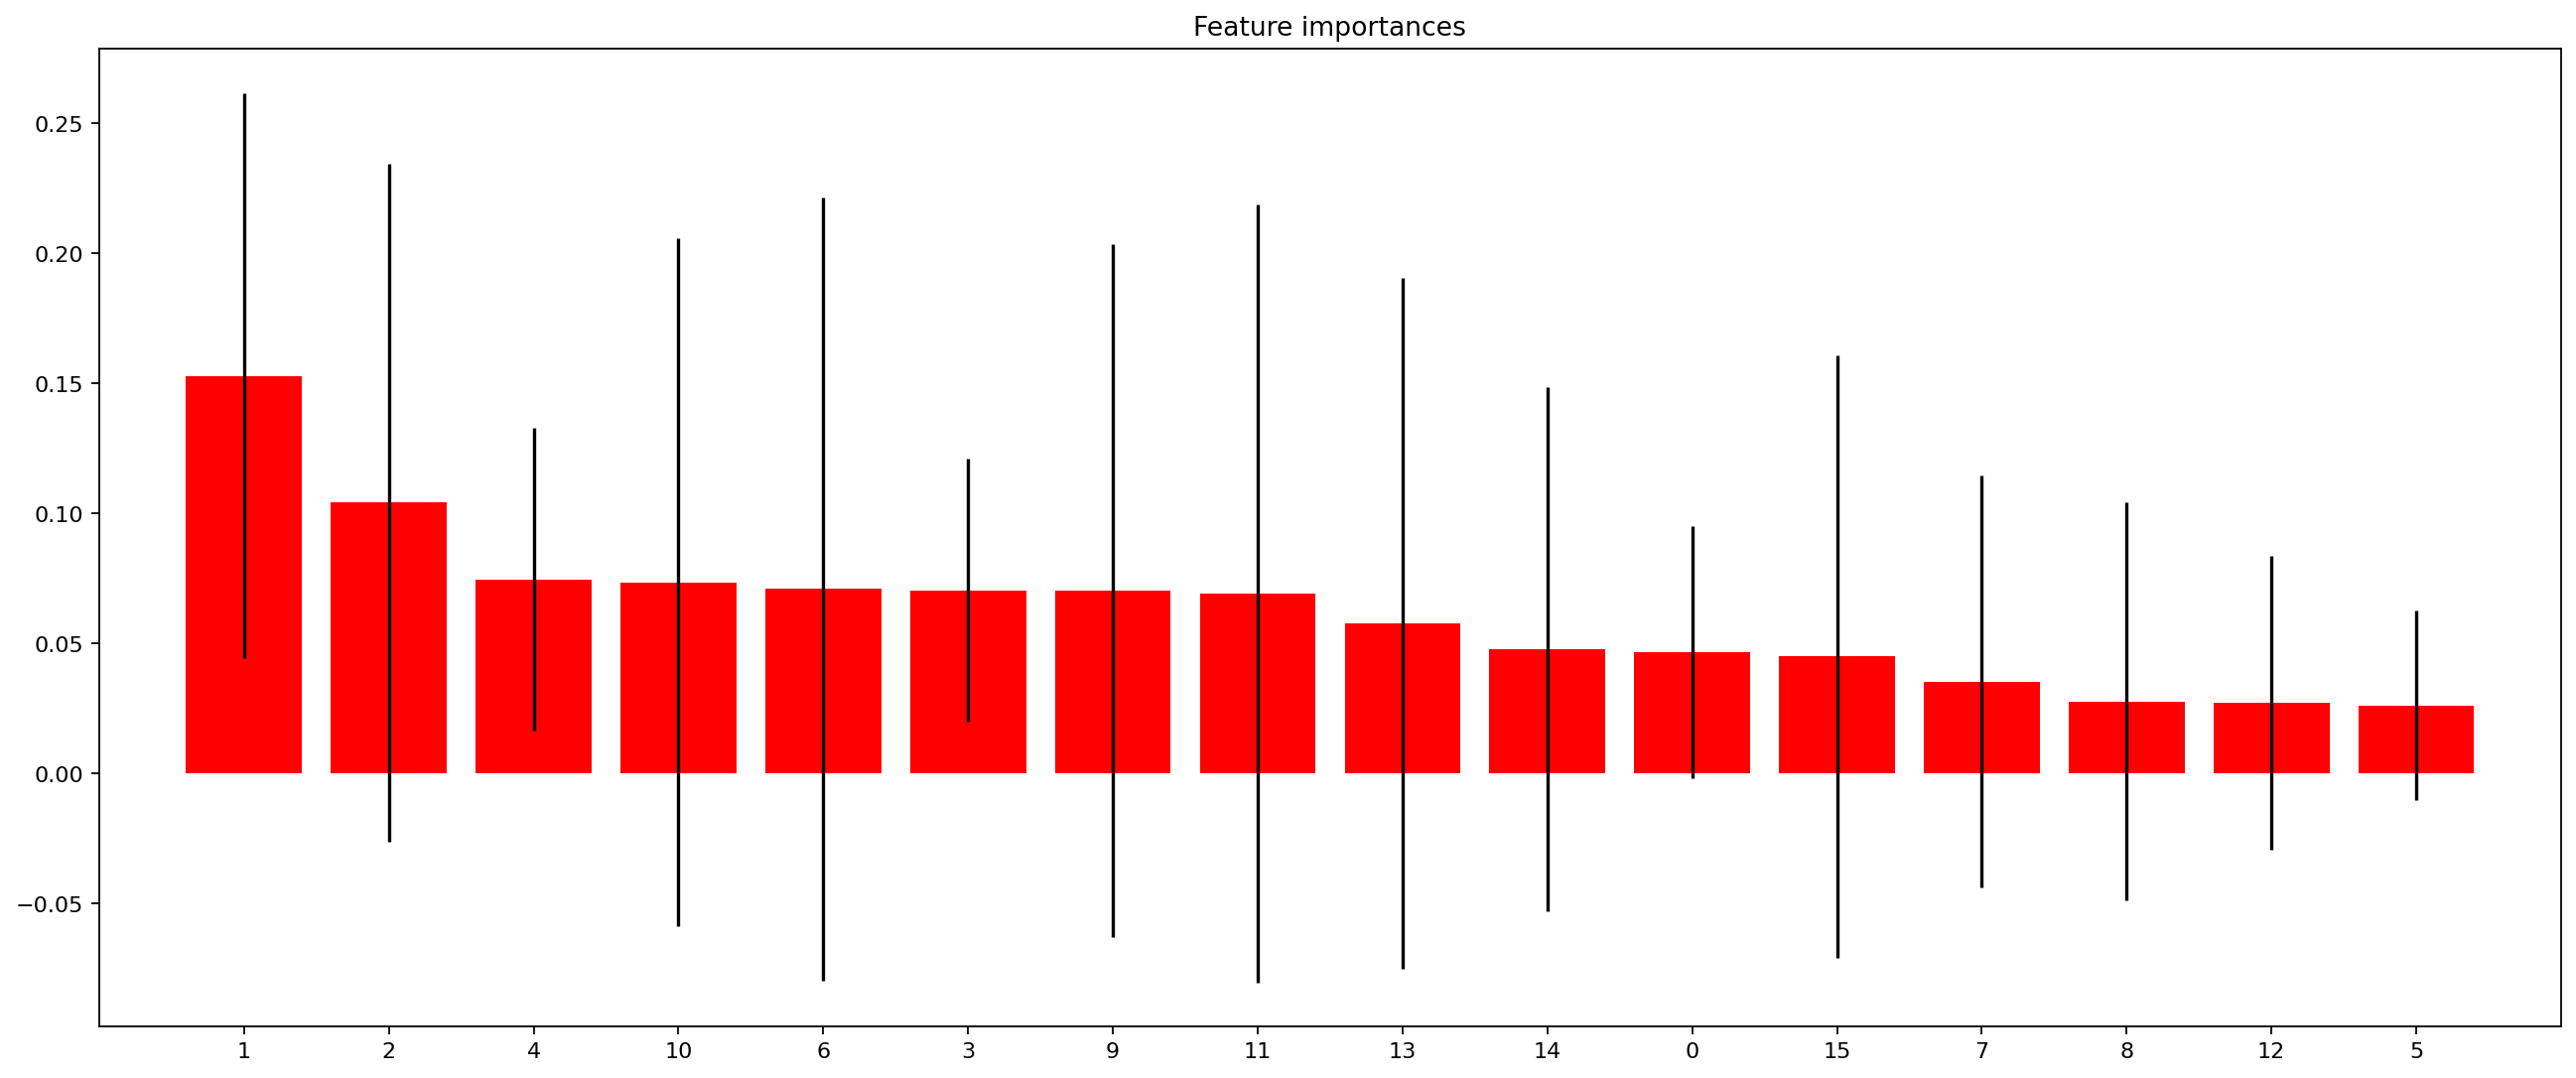

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [18]:
for f in range(16):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 1 - M1 (0.152951)
2. feature 2 - M2 (0.104140)
3. feature 4 - MP2 (0.074684)
4. feature 10 - T6 (0.073555)
5. feature 6 - P9 (0.070993)
6. feature 3 - MP1 (0.070445)
7. feature 9 - P26 (0.070227)
8. feature 11 - T17 (0.069223)
9. feature 13 - F20 (0.057706)
10. feature 14 - F21 (0.047823)
11. feature 0 - Class (0.046682)
12. feature 15 - F22 (0.045008)
13. feature 7 - P15 (0.035336)
14. feature 8 - P16 (0.027774)
15. feature 12 - F4 (0.027263)
16. feature 5 - Sc (0.026189)


In [19]:
best_features = []
for i in indices[:16]:
    best_features.append(features[i])

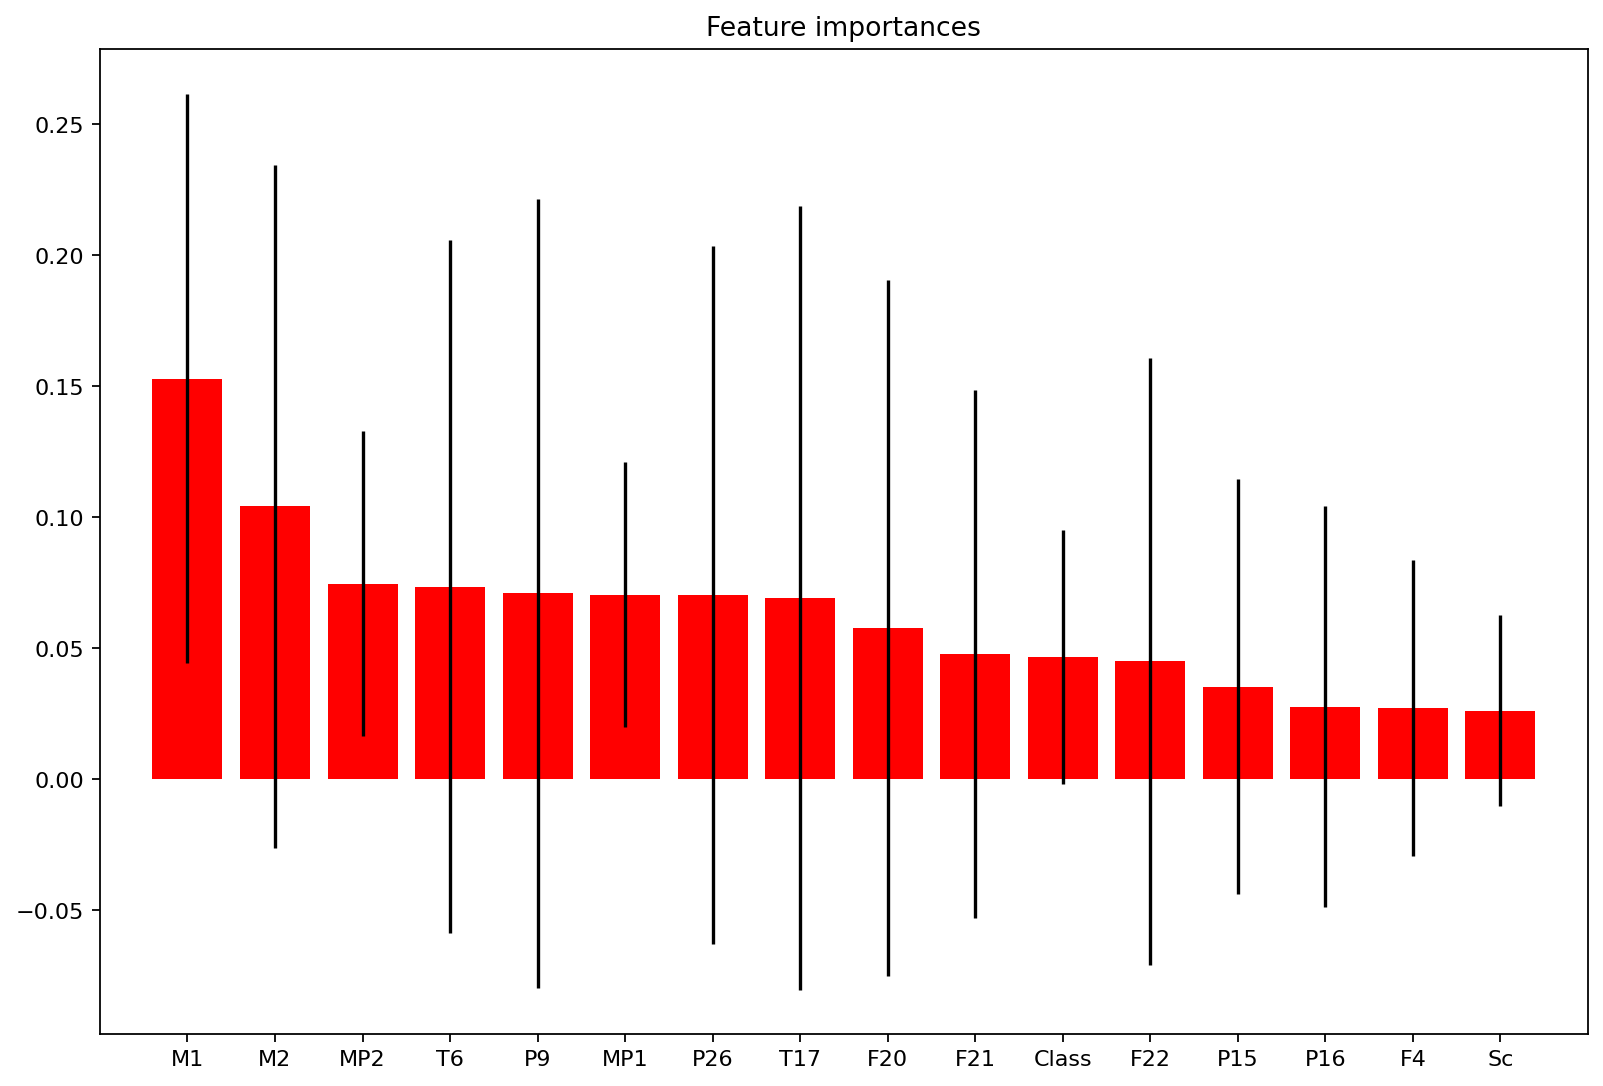

In [22]:
# Plot the top 16 feature importances of the forest
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(16), importances[indices][:16],
       color="r",  yerr=std[indices][:16], align="center")
#plt.xticks(range(16), best_features)
#plt.xlim([-1, 9])
#plt.show()
plt.xticks(range(16), best_features)
plt.xlim([-1, 16])
plt.show()

# **Machine Learning**

# **1. Model RandomForestClassifier**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Step 2: Prepare your data
# Assuming you have X (features) and y (labels) ready

# Step 3: Create an instance of the RandomForestClassifier model
model_RF = RandomForestClassifier(n_estimators=50, random_state=42)

# Step 4: Train the model1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_RF.fit(X_train, y_train)

# Step 5: Make predictions
y_pred1=model_RF.predict(X_train)
# Step 6: Evaluate the model1's performance
accuracy_RF = accuracy_score(y_train, y_pred1)
print("accuracy model RF:", accuracy_RF)

model_RF.score(X, y) # R-squared
score_RF=model_RF.score(X_train, y_train)
print("score model RF:",score_RF)

print(metrics.confusion_matrix(y_train, y_pred1))
print(metrics.classification_report(y_train, y_pred1))

<ipython-input-23-c8472f647f1e>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(X_train, y_train)


accuracy model RF: 0.9988095238095238
score model RF: 0.9988095238095238
[[501   1]
 [  0 338]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       502
           1       1.00      1.00      1.00       338

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



([<matplotlib.axis.YTick at 0x7bd85450efb0>,
 [Text(0, 0.5, 'Fail 0'), Text(0, 1.5, 'Pass 1')])

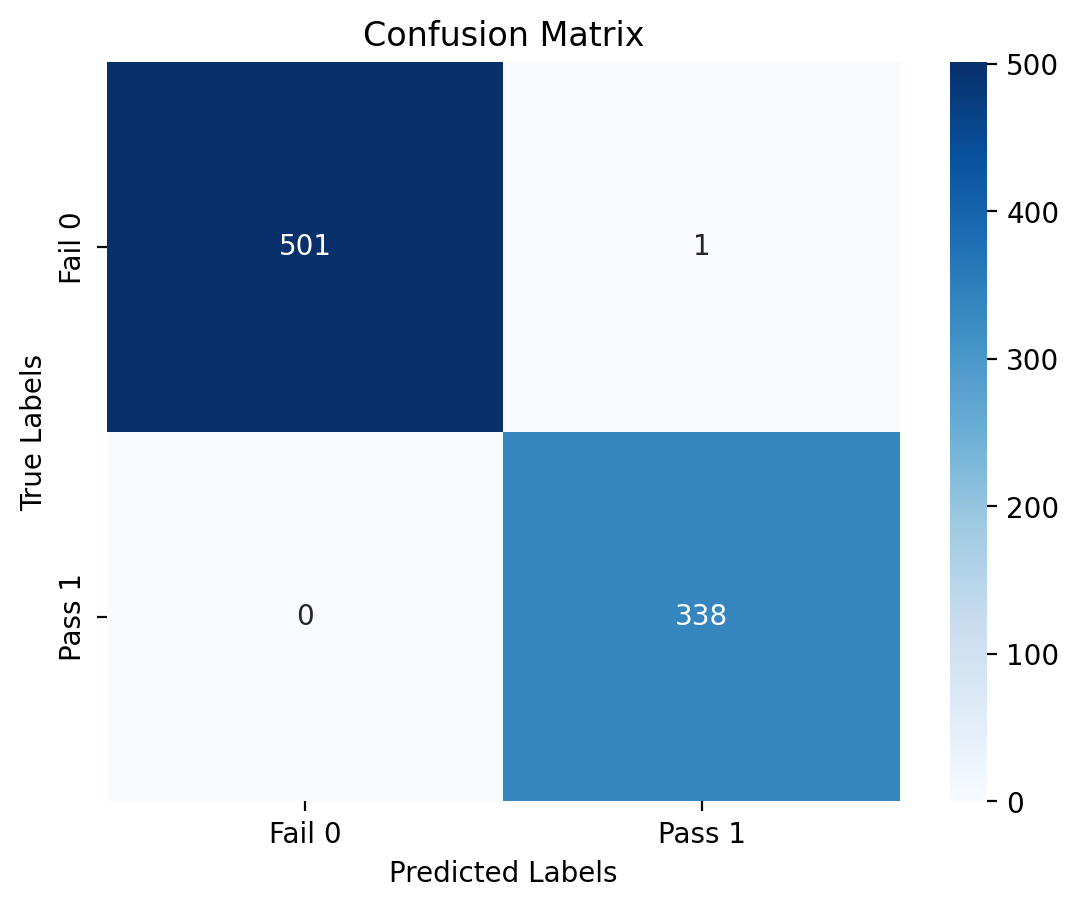

In [24]:
# Model RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the true labels and predicted labels
true_labels = y_train
predicted_labels = y_pred1

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Fail 0', 'Pass 1'])
plt.yticks([0.5, 1.5], ['Fail 0', 'Pass 1'])

Accuracy model LR: 0.9619047619047619
score model RF: 0.9619047619047619
[[124   5]
 [  3  78]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       129
           1       0.94      0.96      0.95        81

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



([<matplotlib.axis.YTick at 0x7bd8543f78b0>,
 [Text(0, 0.5, 'Fail 0'), Text(0, 1.5, 'Pass 1')])

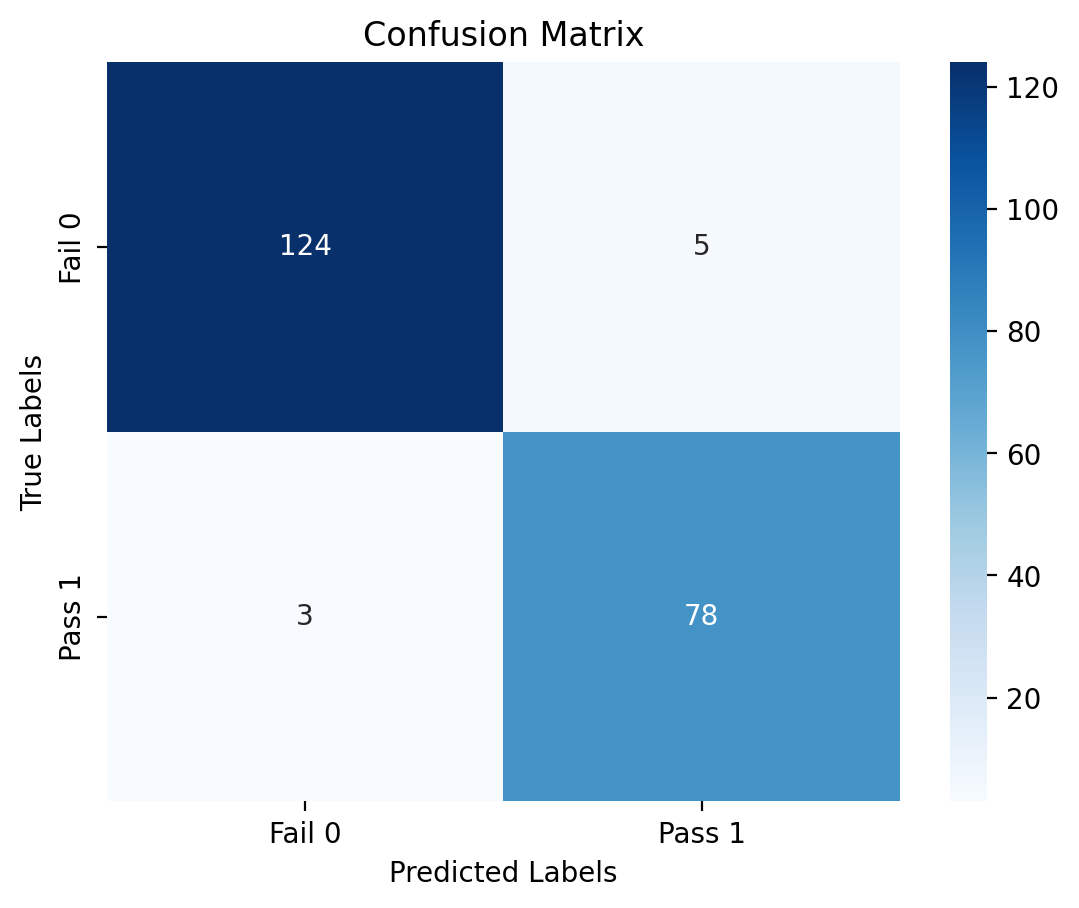

In [25]:
# Model RandomForestClassifier
y_pred11=model_RF.predict(X_test)

accuracy_RF1 = accuracy_score(y_test, y_pred11)
print("Accuracy model LR:", accuracy_RF1)

model_RF.score(X, y) # R-squared
score_RF1=model_RF.score(X_test, y_test)
print("score model RF:",score_RF1)

print(metrics.confusion_matrix(y_test, y_pred11))
print(metrics.classification_report(y_test, y_pred11))

# Define the true labels and predicted labels
true_labels = y_test
predicted_labels = y_pred11

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Fail 0', 'Pass 1'])
plt.yticks([0.5, 1.5], ['Fail 0', 'Pass 1'])

# **2. Model LogisticRegression**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Step 2: Prepare your data
# Assuming you have X (features) and y (labels) ready

# Step 3: Create an instance of the LogisticRegression model
model_LR = LogisticRegression()

# Step 4: Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the number of epochs
num_epochs = 100
# Train the model for the specified number of epochs
for epoch in range(num_epochs):
    model_LR.fit(X_train, y_train)

# Step 5: Make predictions
y_pred2=model_LR.predict(X_train)
# Step 6: Evaluate the model's performance
accuracy_LR = accuracy_score(y_train, y_pred2)
print("Accuracy model LR:", accuracy_LR)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Accuracy model LR: 0.9857142857142858


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Step 5: Make predictions
y_pred2=model_LR.predict(X_train)
# Step 6: Evaluate the model's performance
accuracy_LR = accuracy_score(y_train, y_pred2)
print("Accuracy model LR:", accuracy_LR)

model_LR.score(X, y) # R-squared
score_LR=model_LR.score(X_train, y_train)
print("score model LR:",score_LR)

print(metrics.confusion_matrix(y_train, y_pred2))
print(metrics.classification_report(y_train, y_pred2))

Accuracy model LR: 0.9857142857142858
score model LR: 0.9857142857142858
[[495   7]
 [  5 333]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       502
           1       0.98      0.99      0.98       338

    accuracy                           0.99       840
   macro avg       0.98      0.99      0.99       840
weighted avg       0.99      0.99      0.99       840



([<matplotlib.axis.YTick at 0x7bd854317a00>,
 [Text(0, 0.5, 'Fail 0'), Text(0, 1.5, 'Pass 1')])

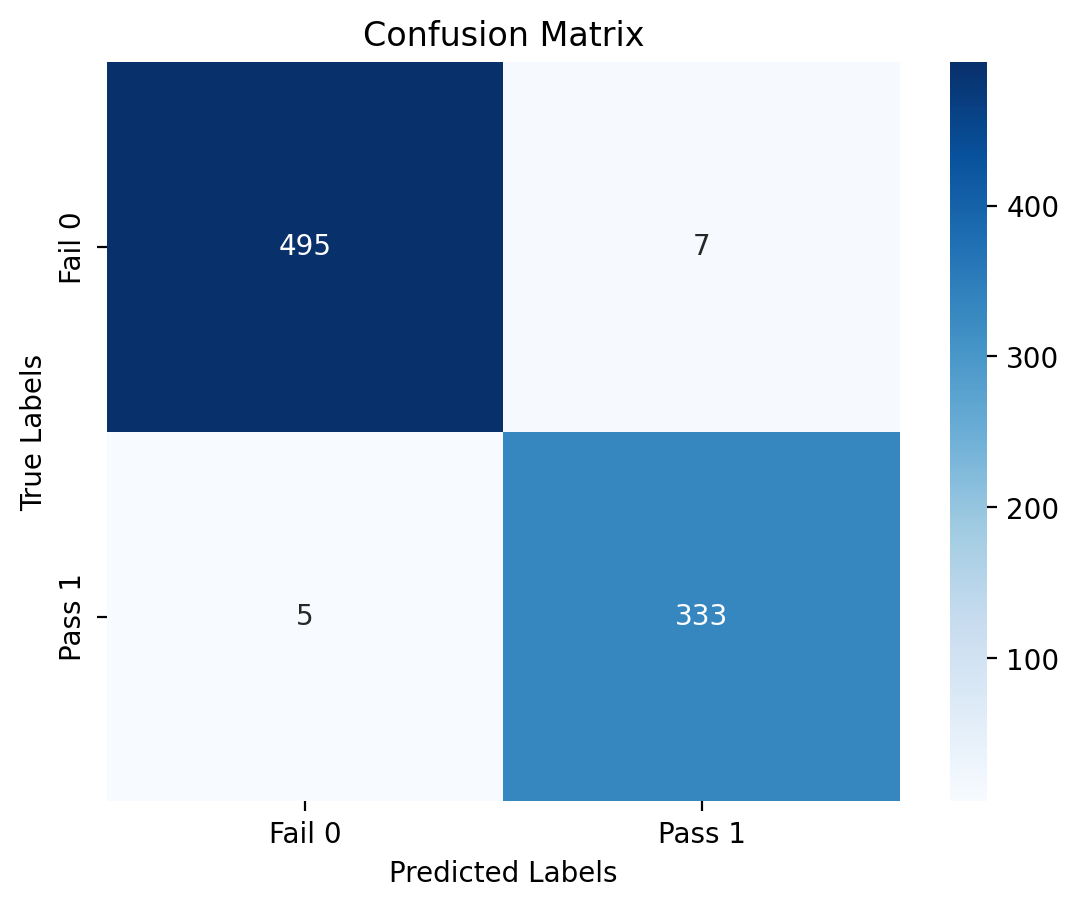

In [28]:
# model2 LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the true labels and predicted labels
true_labels = y_train
predicted_labels = y_pred2

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Fail 0', 'Pass 1'])
plt.yticks([0.5, 1.5], ['Fail 0', 'Pass 1'])

Accuracy model LR: 0.9857142857142858
score model LR: 0.9857142857142858
[[126   3]
 [  0  81]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       129
           1       0.96      1.00      0.98        81

    accuracy                           0.99       210
   macro avg       0.98      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210



([<matplotlib.axis.YTick at 0x7bd8541cc460>,
 [Text(0, 0.5, 'Fail 0'), Text(0, 1.5, 'Pass 1')])

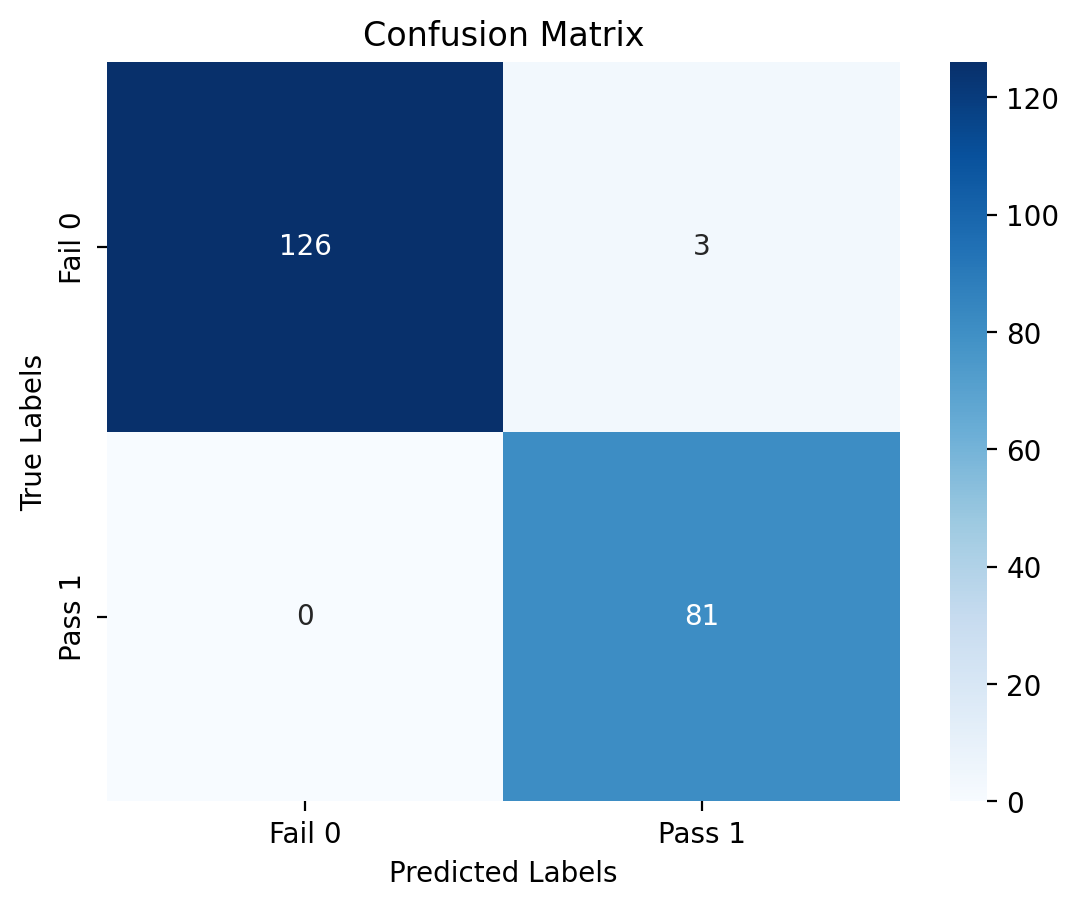

In [29]:
# model2 LogisticRegression
y_pred22=model_LR.predict(X_test)

accuracy_LR1 = accuracy_score(y_test, y_pred22)
print("Accuracy model LR:", accuracy_LR1)

model_LR.score(X, y) # R-squared
score_LR1=model_LR.score(X_test, y_test)
print("score model LR:",score_LR1)

print(metrics.confusion_matrix(y_test, y_pred22))
print(metrics.classification_report(y_test, y_pred22))

# Define the true labels and predicted labels
true_labels = y_test
predicted_labels = y_pred22

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Fail 0', 'Pass 1'])
plt.yticks([0.5, 1.5], ['Fail 0', 'Pass 1'])

# **3. Model SVM**

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Prepare your data
# Assuming you have X (features) and y (labels) ready

# Step 3: Create an instance of the SVC model
model_SVM = SVC(kernel='linear', C=1.0)

# Step 4: Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_SVM.fit(X_train, y_train)

# Step 5: Make predictions
y_pred3 = model_SVM.predict(X_train)

# Step 6: Evaluate the model's performance
accuracy_SVM = accuracy_score(y_train, y_pred3)
print("Accuracy model SVM:", accuracy_SVM)

model_SVM.score(X, y) # R-squared
score_SVM=model_SVM.score(X_train, y_train)
print("score model SVM:",score_SVM)

print(metrics.confusion_matrix(y_train, y_pred3))
print(metrics.classification_report(y_train, y_pred3))

Accuracy model SVM: 0.9833333333333333
score model SVM: 0.9833333333333333
[[495   7]
 [  7 331]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       502
           1       0.98      0.98      0.98       338

    accuracy                           0.98       840
   macro avg       0.98      0.98      0.98       840
weighted avg       0.98      0.98      0.98       840



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


([<matplotlib.axis.YTick at 0x7bd854646c80>,
 [Text(0, 0.5, 'Fail 0'), Text(0, 1.5, 'Pass 1')])

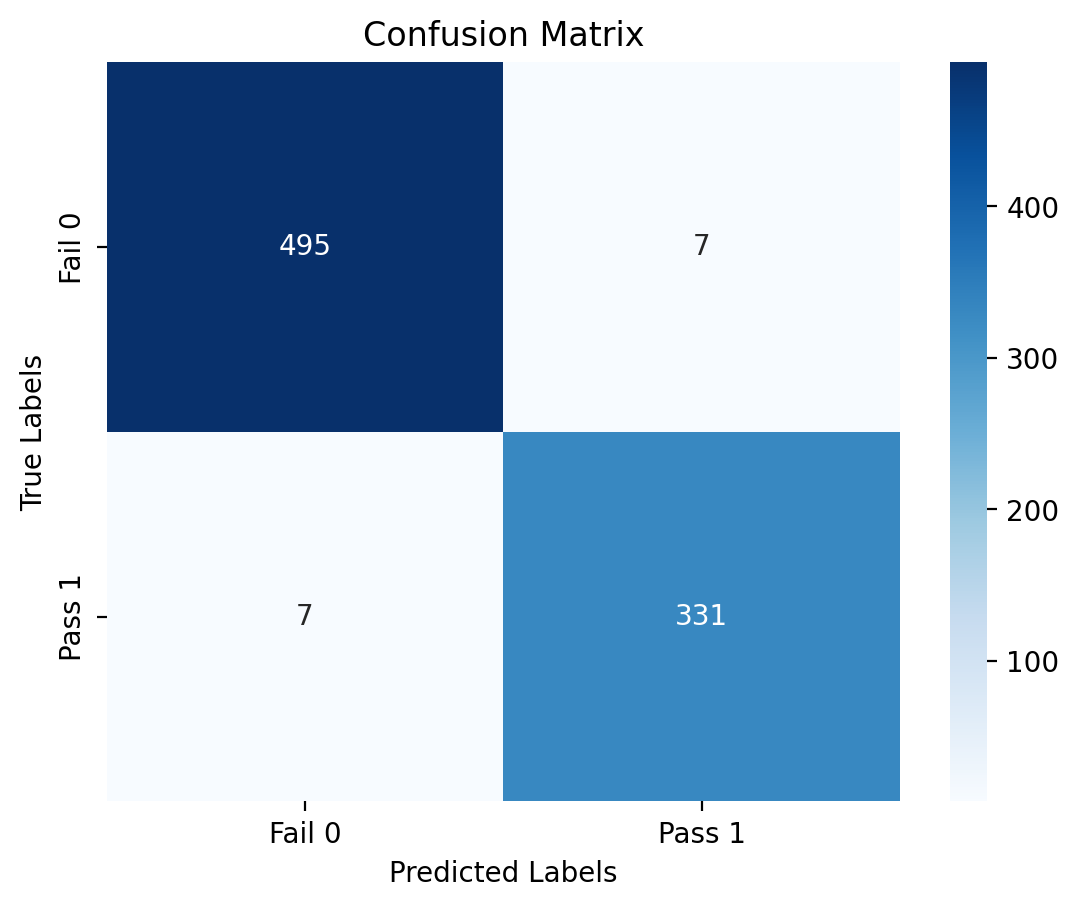

In [31]:
# model3 Support Vector Machine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the true labels and predicted labels
true_labels = y_train
predicted_labels = y_pred3

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Fail 0', 'Pass 1'])
plt.yticks([0.5, 1.5], ['Fail 0', 'Pass 1'])

Accuracy model SVM: 0.9714285714285714
score model SVM: 0.9714285714285714
[[126   3]
 [  3  78]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       129
           1       0.96      0.96      0.96        81

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



([<matplotlib.axis.YTick at 0x7bd8545f1990>,
 [Text(0, 0.5, 'Fail 0'), Text(0, 1.5, 'Pass 1')])

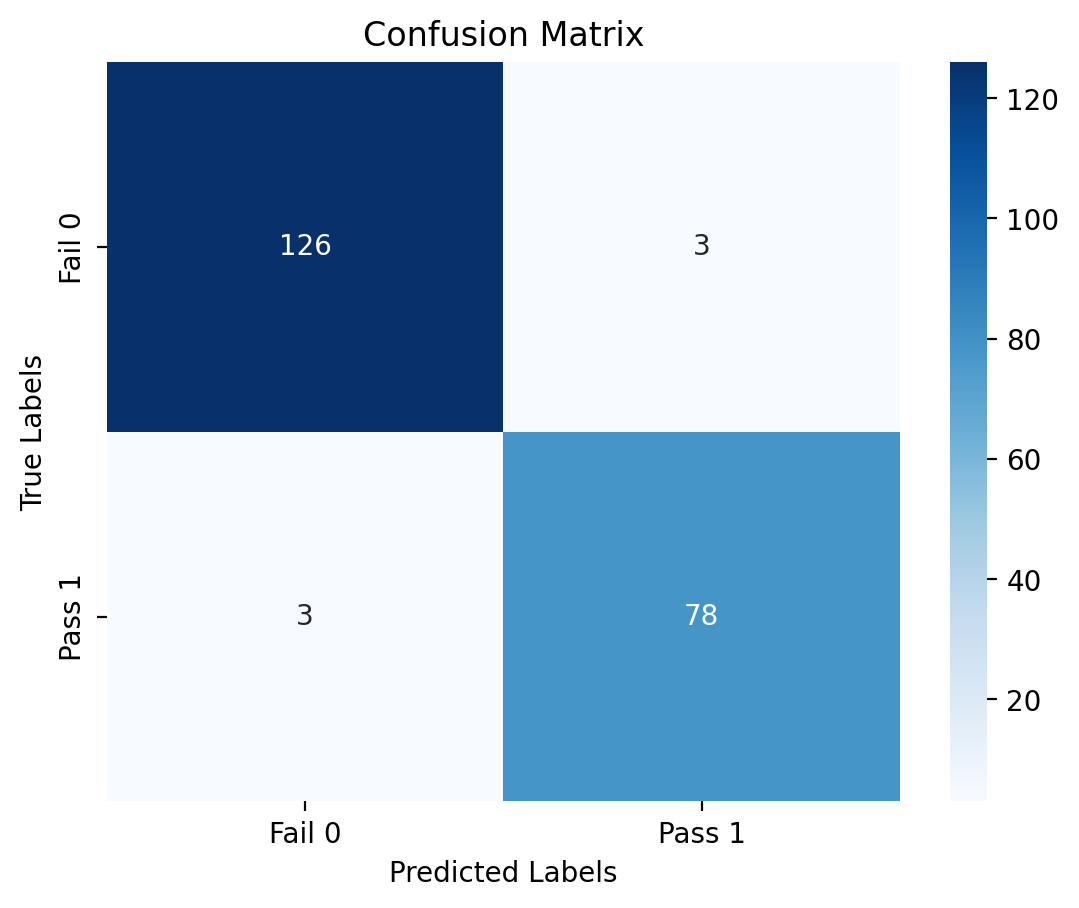

In [32]:
# model3 Support Vector Machine
y_pred33=model_SVM.predict(X_test)

accuracy_SVM1 = accuracy_score(y_test, y_pred33)
print("Accuracy model SVM:", accuracy_SVM1)

model_SVM.score(X, y) # R-squared
score_SVM1=model_SVM.score(X_test, y_test)
print("score model SVM:",score_SVM1)

print(metrics.confusion_matrix(y_test, y_pred33))
print(metrics.classification_report(y_test, y_pred33))

# Define the true labels and predicted labels
true_labels = y_test
predicted_labels = y_pred33

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Fail 0', 'Pass 1'])
plt.yticks([0.5, 1.5], ['Fail 0', 'Pass 1'])

# **4. Model KNeighborsClassifier**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Prepare your data
# Assuming you have X (features) and y (labels) ready

# Step 3: Create an instance of the KNeighborsClassifier model
model_KNN = KNeighborsClassifier(n_neighbors=5)

# Step 4: Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_KNN.fit(X_train, y_train)

# Step 5: Make predictions
y_pred4 = model_KNN.predict(X_train)

# Step 6: Evaluate the model's performance
accuracy_KNN = accuracy_score(y_train, y_pred4)
print("Accuracy Model KNN:", accuracy_KNN)

model_KNN.score(X, y) # R-squared
score_KNN=model_KNN.score(X_train, y_train)
print("score model KNN:",score_KNN)

print(metrics.confusion_matrix(y_train, y_pred4))
print(metrics.classification_report(y_train, y_pred4))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Model KNN: 0.9642857142857143
score model KNN: 0.9642857142857143
[[487  15]
 [ 15 323]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       502
           1       0.96      0.96      0.96       338

    accuracy                           0.96       840
   macro avg       0.96      0.96      0.96       840
weighted avg       0.96      0.96      0.96       840



([<matplotlib.axis.YTick at 0x7bd854863fa0>,
 [Text(0, 0.5, 'Fail 0'), Text(0, 1.5, 'Pass 1')])

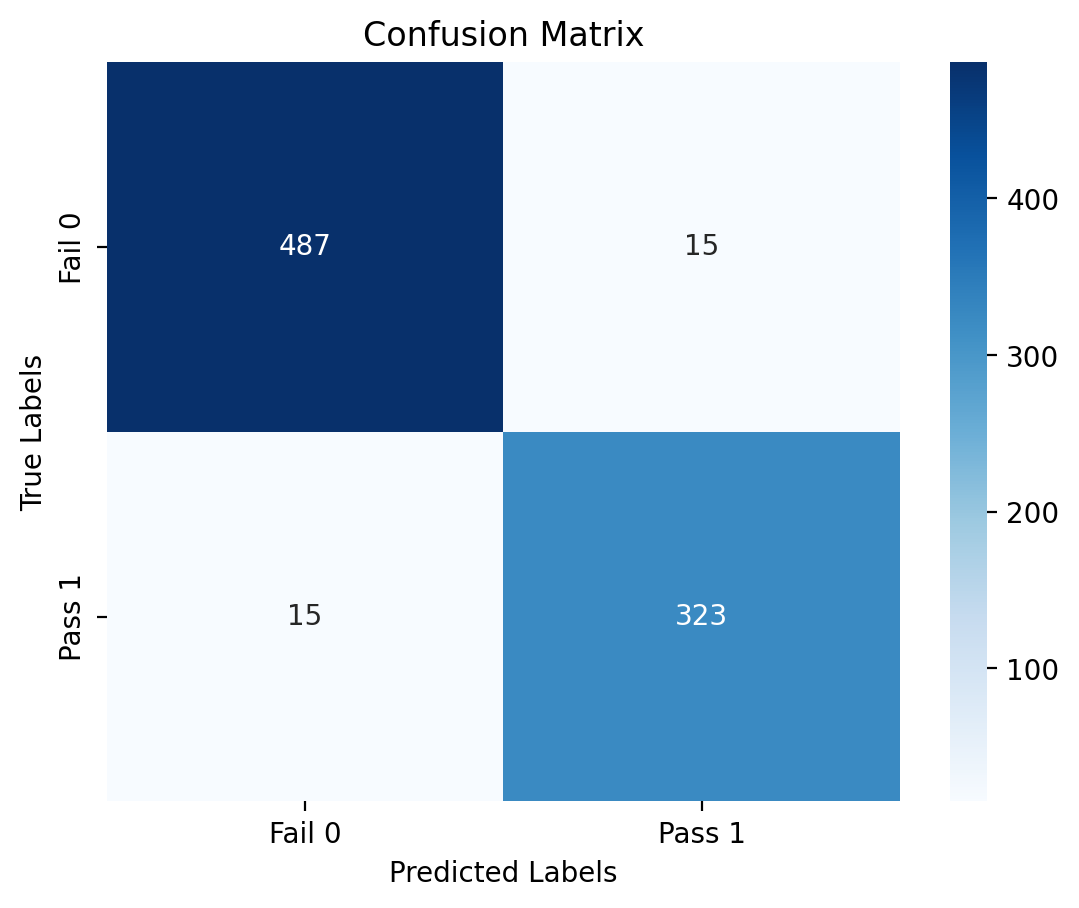

In [34]:
# model4 KNeighborsClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the true labels and predicted labels
true_labels = y_train
predicted_labels = y_pred4

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Fail 0', 'Pass 1'])
plt.yticks([0.5, 1.5], ['Fail 0', 'Pass 1'])

Accuracy model KNN: 0.9714285714285714
score model KNN: 0.9428571428571428
[[126   3]
 [  3  78]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       129
           1       0.96      0.96      0.96        81

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



([<matplotlib.axis.YTick at 0x7bd8547cf9a0>,
 [Text(0, 0.5, 'Fail 0'), Text(0, 1.5, 'Pass 1')])

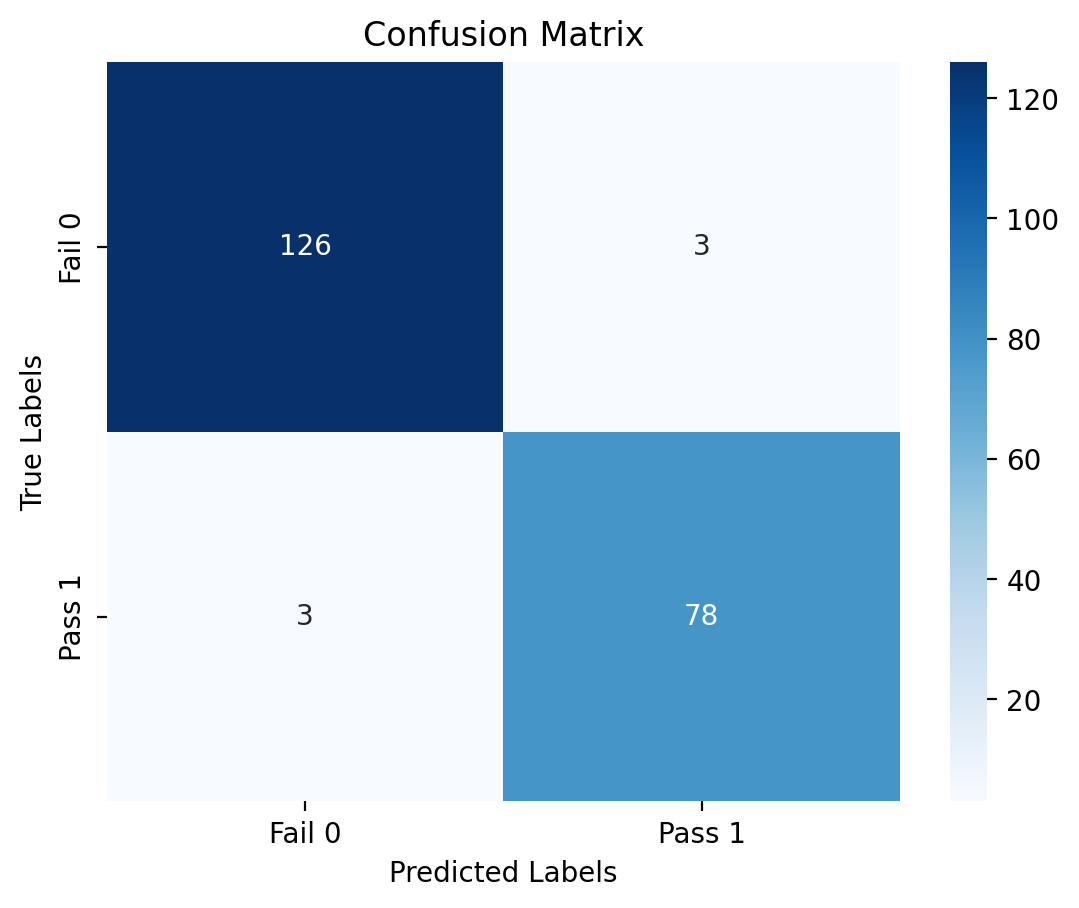

In [35]:
# model4 KNeighborsClassifier
y_pred44=model_SVM.predict(X_test)

accuracy_KNN1 = accuracy_score(y_test, y_pred44)
print("Accuracy model KNN:", accuracy_KNN1)

model_KNN.score(X, y) # R-squared
score_KNN1=model_KNN.score(X_test, y_test)
print("score model KNN:",score_KNN1)

print(metrics.confusion_matrix(y_test, y_pred44))
print(metrics.classification_report(y_test, y_pred44))


# Define the true labels and predicted labels
true_labels = y_test
predicted_labels = y_pred44

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Fail 0', 'Pass 1'])
plt.yticks([0.5, 1.5], ['Fail 0', 'Pass 1'])

In [36]:
model_names = ['RandomForestClassifier ','LogisticRegression ', 'Support Vector Machine Classifier','K Nearest Neighbour Classifier']
r2_train_scores = [score_RF,score_LR,score_SVM, score_KNN]
r2_test_scores = [score_RF1,score_LR1,score_SVM1, score_KNN1]
summary_table = pd.DataFrame({
    'Model': model_names,
    'R2 Score (Training)': r2_train_scores,
    'R2 Score (Testing)': r2_test_scores,
})

summary_table

,Model,R2 Score (Training),R2 Score (Testing)
0,RandomForestClassifier,0.998810,0.961905
1,LogisticRegression,0.985714,0.985714
2,Support Vector Machine Classifier,0.983333,0.971429
3,K Nearest Neighbour Classifier,0.964286,0.942857


In [37]:
model_names = ['RandomForestClassifier ','LogisticRegression ', 'Support Vector Machine Classifier','K Nearest Neighbour Classifier']
r2_train_accuracy = [accuracy_RF,accuracy_LR,accuracy_SVM, accuracy_KNN]
r2_test_accuracy = [accuracy_RF1,accuracy_LR1,accuracy_SVM1, accuracy_KNN1]
summary_table = pd.DataFrame({
    'Model': model_names,
    'R2 accuracy (Training)': r2_train_accuracy,
    'R2 accuracy (Testing)': r2_test_accuracy,
})

summary_table

,Model,R2 accuracy (Training),R2 accuracy (Testing)
0,RandomForestClassifier,0.998810,0.961905
1,LogisticRegression,0.985714,0.985714
2,Support Vector Machine Classifier,0.983333,0.971429
3,K Nearest Neighbour Classifier,0.964286,0.971429


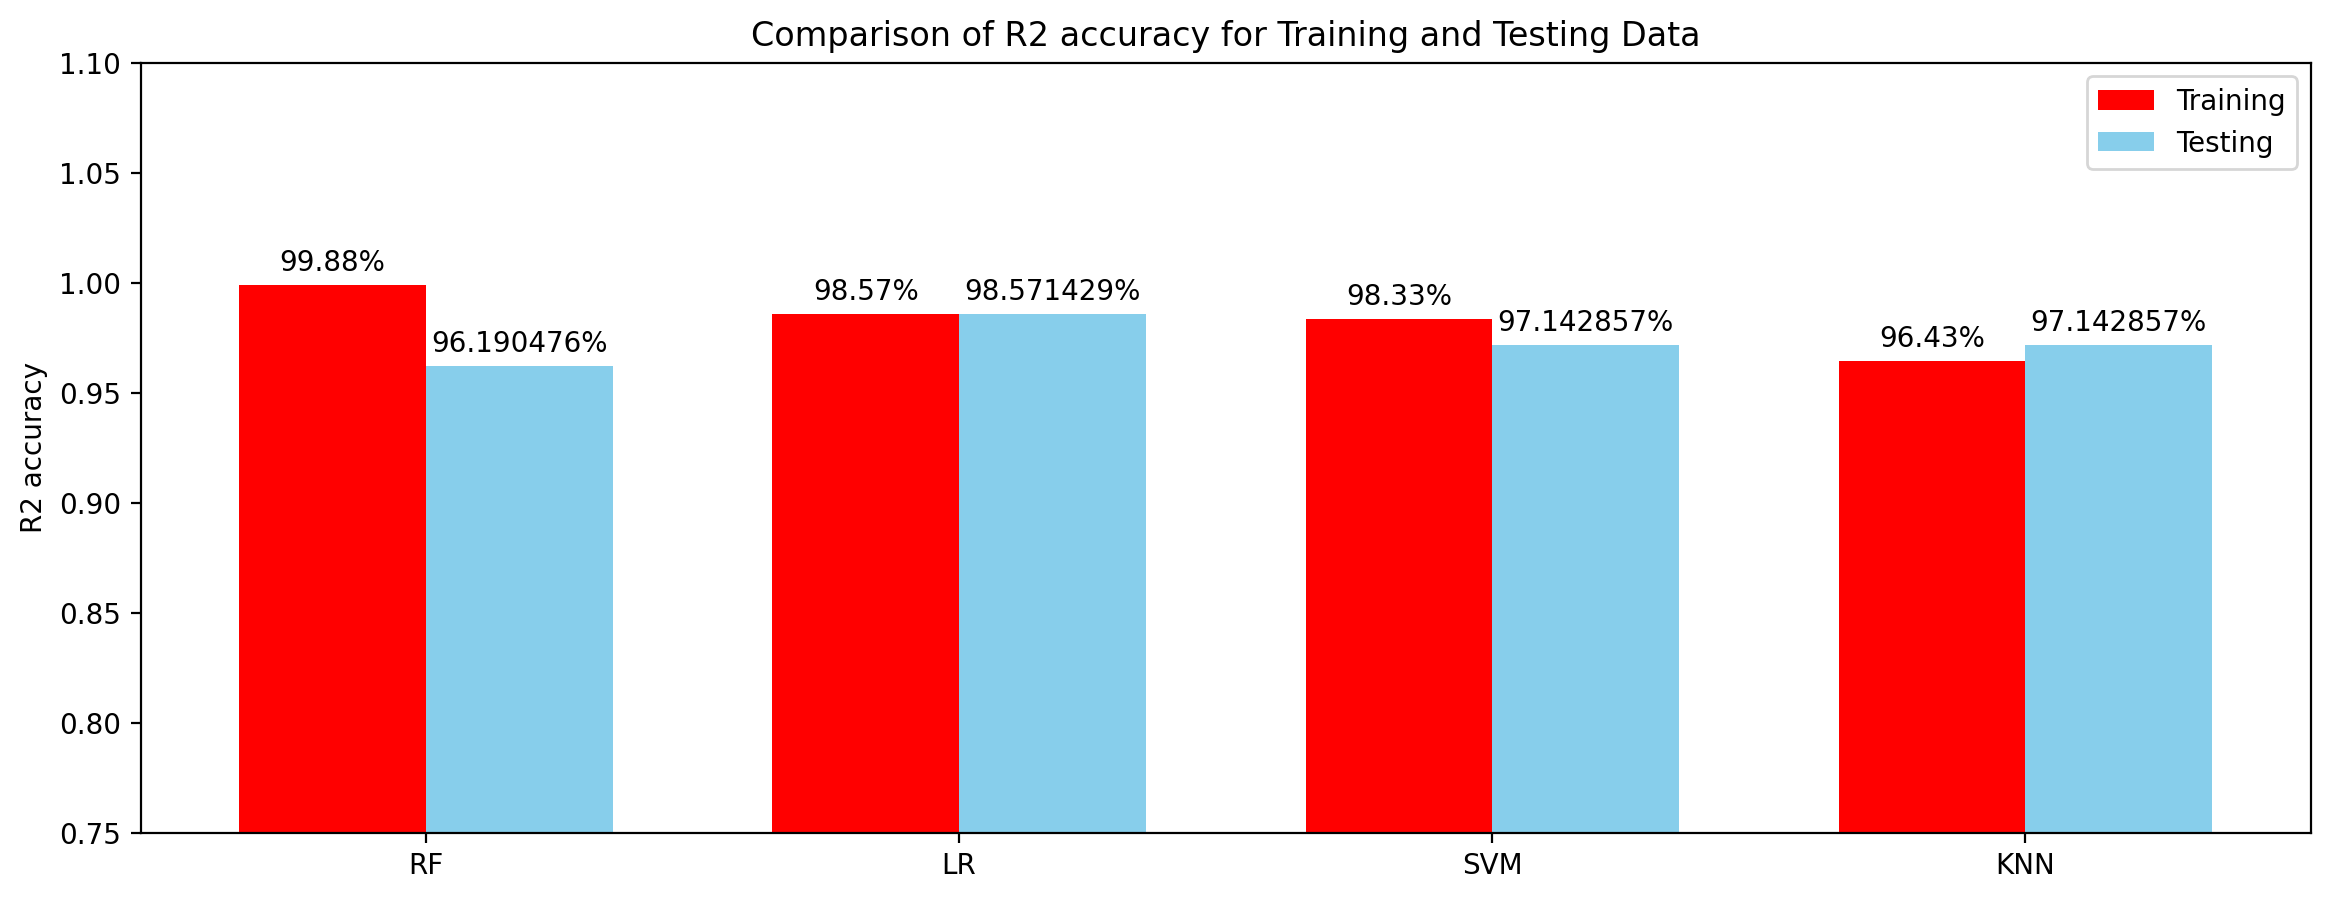

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data
model_names = ['RF', 'LR', 'SVM', 'KNN']
training_accuracy = [accuracy_RF,accuracy_LR,accuracy_SVM,accuracy_KNN]
testing_accuracy = [accuracy_RF1,accuracy_LR1,accuracy_SVM1,accuracy_KNN1]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 5))

# Bar width
width = 0.35

# X values for the bars
x = np.arange(len(model_names))

# Plot the bars for training scores
rects1 = ax.bar(x, training_accuracy, width, label='Training', color=[color for color in ['red']])

# Plot the bars for testing scores
rects2 = ax.bar(x + width, testing_accuracy, width, label='Testing', color='skyblue')
for r1, r2 in zip(rects1, rects2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    #percent = int(h1 * 100 )
    percent1 = h1 * 100
    percent2 = h2 * 100
    ax.annotate('{:.2f}%'.format(percent1,':2f'),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.annotate('{:0f}%'.format(percent2,':2f'),
                    xy=(r2.get_x() + r2.get_width() / 2, h2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels and title
ax.set_ylabel('R2 accuracy')
ax.set_title('Comparison of R2 accuracy for Training and Testing Data')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(model_names)
plt.ylim(0.75, 1.1)
ax.legend()

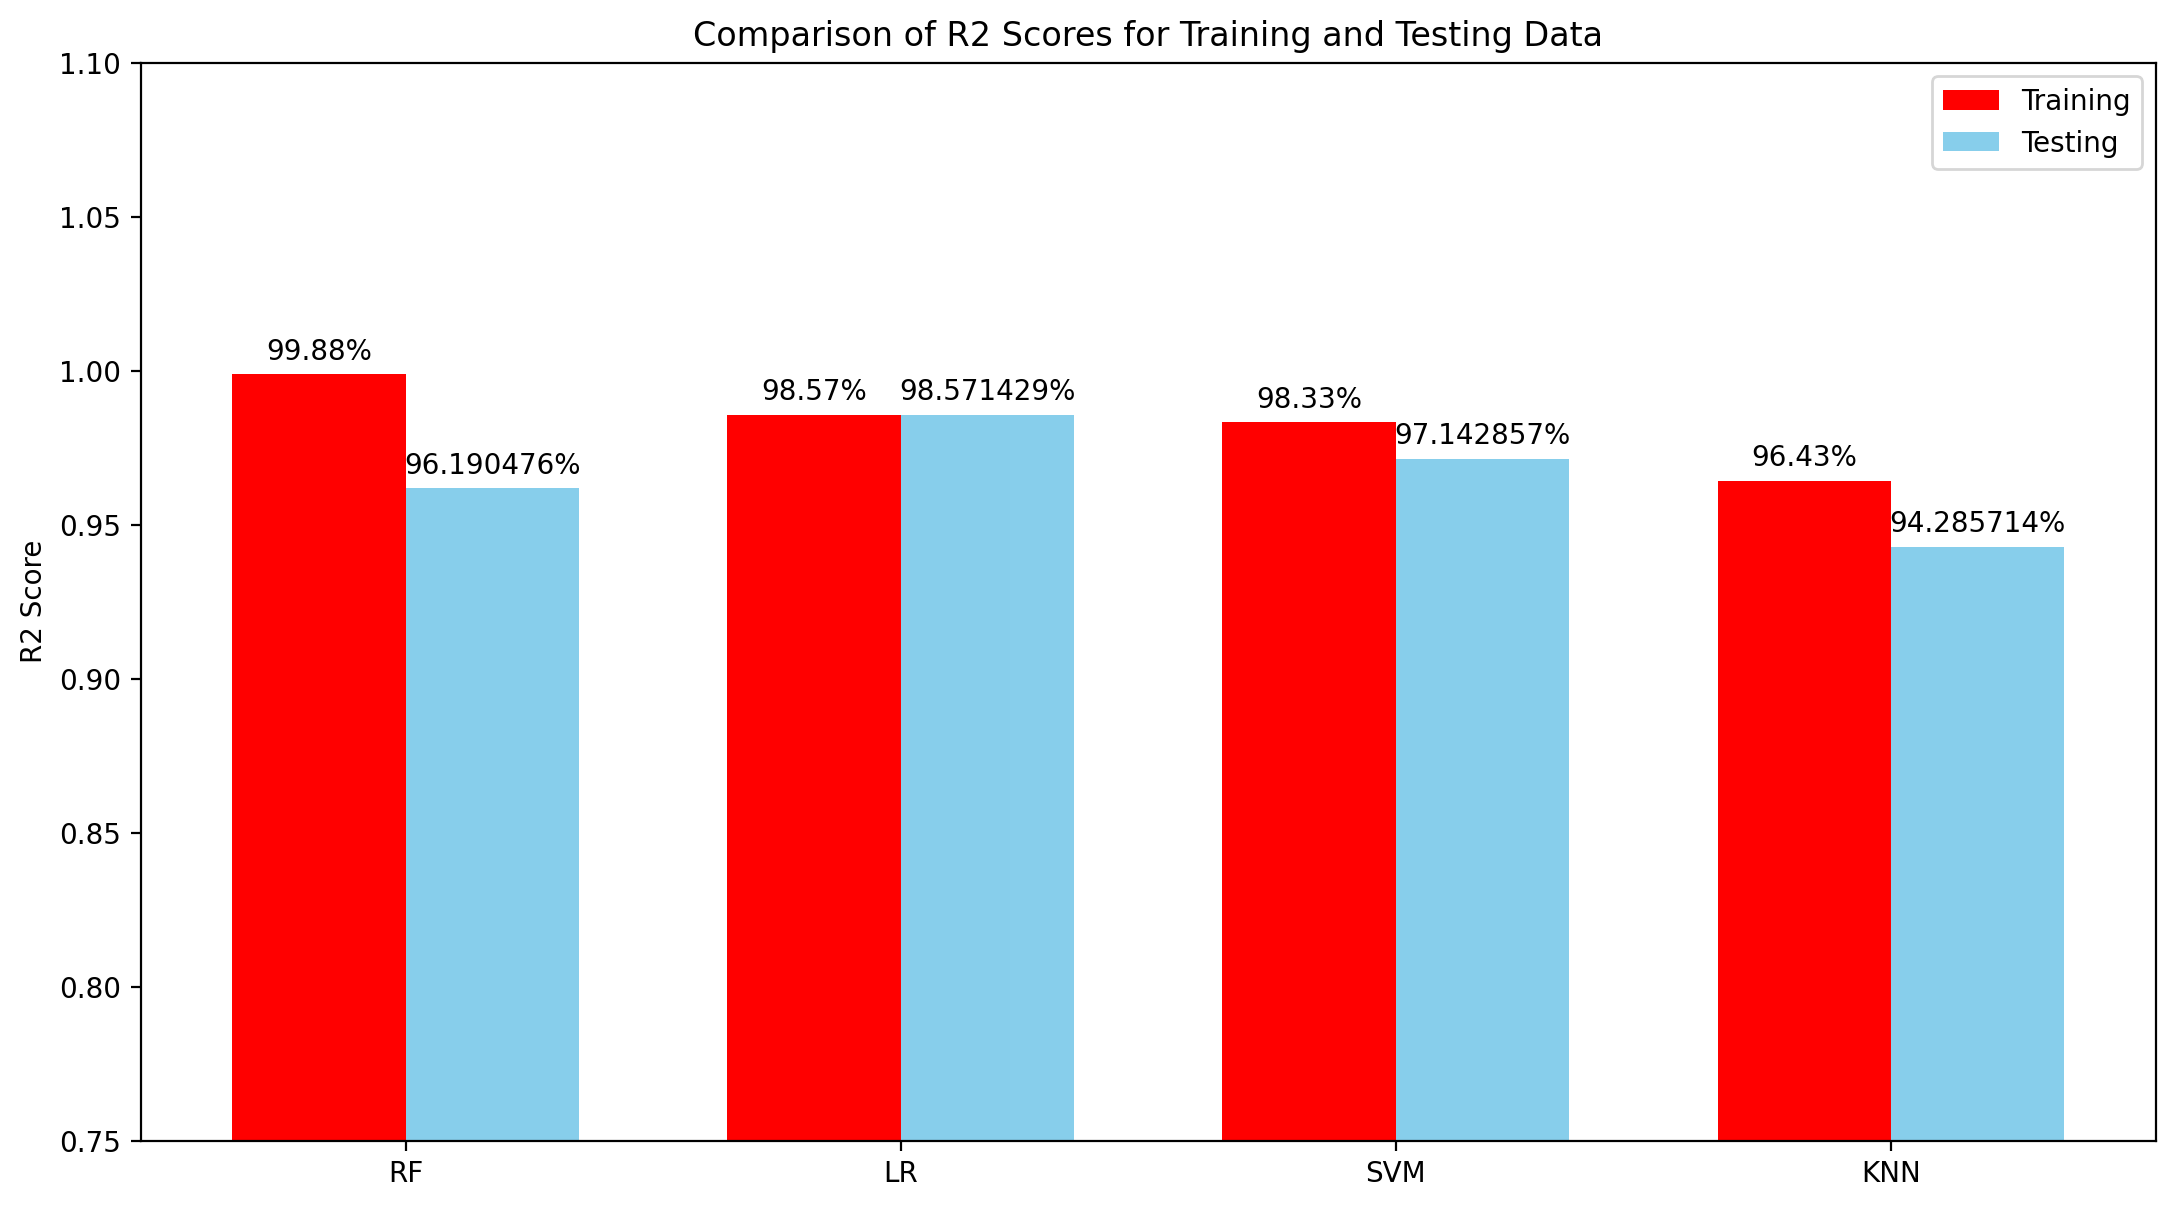

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Data
model_names = ['RF', 'LR', 'SVM', 'KNN']
training_scores = [score_RF,score_LR,score_SVM,score_KNN]
testing_scores = [score_RF1,score_LR1,score_SVM1,score_KNN1]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(13, 7))

# Bar width
width = 0.35

# X values for the bars
x = np.arange(len(model_names))

# Plot the bars for training scores
rects1 = ax.bar(x, training_scores, width, label='Training', color=[color for color in ['red', 'red', 'red', 'red']])

# Plot the bars for testing scores
rects2 = ax.bar(x + width, testing_scores, width, label='Testing', color='skyblue')
for r1, r2 in zip(rects1, rects2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    #percent = int(h1 * 100 )
    percent1 = h1 * 100
    percent2 = h2 * 100
    ax.annotate('{:.2f}%'.format(percent1,':2f'),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.annotate('{:0f}%'.format(percent2,':2f'),
                    xy=(r2.get_x() + r2.get_width() / 2, h2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels and title
ax.set_ylabel('R2 Score')
ax.set_title('Comparison of R2 Scores for Training and Testing Data')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(model_names)
plt.ylim(0.75, 1.1)
ax.legend()

In [42]:
# Save models
import pickle

with open('model.RF', 'wb') as f:
    pickle.dump(model_RF,f)

with open('model.LR', 'wb') as f:
    pickle.dump(model_LR, f)

with open('model.SVM', 'wb') as f:
    pickle.dump(model_SVM, f)

with open('model.KNN', 'wb') as f:
    pickle.dump(model_KNN, f)

In [43]:
X_test.to_csv('X_test16.csv')
y_train.to_csv('y_train16.csv')